<a href="https://colab.research.google.com/github/fbianchis/Robotica_Movel/blob/master/Atividade2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

## Operação de Rotação

${}^B\mathbf{P} = \mathbf{R}(\theta) {}^A\mathbf{P} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 \\
\sin(\theta) & \cos(\theta) & 0 \\
0 & 0 & 1 \\ 
\end{bmatrix}.
\begin{bmatrix}
{}^Ap_x\\
{}^Ap_y\\
{}^Ap_z\\
\end{bmatrix}$


In [ ]:
theta = 30
angle = 'deg'

In [ ]:
def rotation_matrix(theta, angle='rad'):
    if angle == 'deg':
        theta = np.deg2rad(theta)
    
    matrix = np.array([[np.cos(theta),-np.sin(theta),0],
                       [np.sin(theta),np.cos(theta),0],
                       [0,0,1]])
    return np.round(matrix, 2)

In [ ]:
rotation_matrix(90, angle='deg')

array([[ 0., -1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

In [ ]:
P_a = np.array([[1],
                [0],
                [0]])

In [ ]:
np.dot(rotation_matrix(90, angle='deg'), P_a)

array([[0.],
       [1.],
       [0.]])

## Transformação Homogenea

${}^B\mathbf{P} = \mathcal{A}_0^1 {}^A\mathbf{P} = 
\begin{bmatrix}
\cos(\theta) & -\sin(\theta) & 0 & q_x\\
\sin(\theta) & \cos(\theta) & 0 & q_y\\
0 & 0 & 1 & q_z\\ 
0 & 0 & 0 & 1\\
\end{bmatrix}.
\begin{bmatrix}
{}^Ap_x\\
{}^Ap_y\\
{}^Ap_z\\
1
\end{bmatrix}$

In [ ]:
theta = 30
angle = 'deg'
Q_a = np.array([1.,0.,0.])
P_a = np.array([[1],
                [0],
                [0],
                [1]])

In [ ]:
def th(theta, Q, angle = 'rad'):
    if angle == 'deg':
        theta = np.deg2rad(theta)
    th_matrix = np.array([[np.cos(theta),   -np.sin(theta), 0.,      Q[0]],
                          [np.sin(theta),   np.cos(theta),  0.,      Q[1]],
                          [0.,        0.,                   1.,      Q[2]],
                          [0.,        0.,                   0.,      1.]])
    return np.round(th_matrix,2)

In [ ]:
P_b= np.dot(th(45,Q_a, angle='deg'), P_a)

In [ ]:
P_b

array([[1.71],
       [0.71],
       [0.  ],
       [1.  ]])

In [ ]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

# Soluções Numérica com Python



# Capacitor Circuit

![](https://www.electronics-tutorials.ws/wp-content/uploads/2013/08/rc1.gif)

$$RC\frac{dV_c(t)}{dt}+V_c(t)=V_s(t)$$

$$\frac{dV_c(t)}{dt}=\frac{1}{RC}V_s(t)-\frac{1}{RC}V_c(t)$$


onde 

$$i_c(t) = C \displaystyle\frac{dv_c(t)}{dt}$$

In [ ]:
def circuit(y, t):
    # y  = Vc
    # dy = dVc
    # tau = RC

    tau = 0.5
    
    if t > 1 and t < 4:
        Vs = 1
    else:
        Vs = 0

    dy = 1/tau*Vs - 1/tau*y
    return dy

In [ ]:
t = 
y0 = 

# Car


![](http://ffden-2.phys.uaf.edu/211_fall2002.web.dir/Garrett_Thatcher/Free%20Body.gif)



$$m\dot{v}+bv+F=u$$
em função de $x$:
$$m\ddot{x}+b\dot{x}+F=u$$

sendo $x$, posicionamento, $\dot{x}$ velocidade e $\ddot{x}$ aceleração.


em função de espaço de estados, aqui é adicioando uma força gravitacional diante do ângulo de inclinação do carro ($\theta$):
$$\frac{d}{dt}\begin{bmatrix} x_0 \\ x_1 \end{bmatrix} = 
\begin{bmatrix} 1 & 0\\ -\displaystyle\frac{b}{m} & +\displaystyle\frac{1}{m} \end{bmatrix}
\begin{bmatrix} x_1 \\ u \end{bmatrix} +
\begin{bmatrix} 0 \\ sin(\theta)g \end{bmatrix}
$$

sendo $x_0$, posicionamento e $x_1$ velocidade e g a força gravitacional ($g=9.8Nm$).


In [ ]:
def car(x,t):
    # x0 = pos
    # x1 = vel

    m = 2000
    b = 200
    g = 9.8

    if x[0] < 90:
        u = 8500
    else:
        u=0

    if x[0] >= 10 and x[0] < 60:
        theta = np.deg2rad(-20)
    elif x[0] >= 60 and x[0] < 90:
        theta = np.deg2rad(-30)
    else:
        theta = 0

    dx = np.zeros(2)

    dx[0] = x[1]
    dx[1] = -b/m*x[1] + 1/m*u + np.sin(theta)*g
    
    return dx

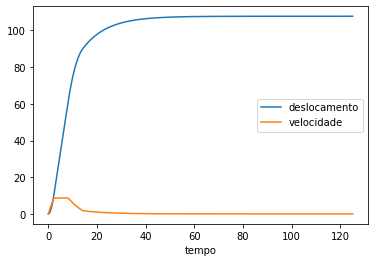

In [ ]:
x0 = [0,0]
t = np.linspace(0,125, 1000)

x = odeint(car, x0, t)
plt.plot(t,x[:,0], t,x[:,1])
plt.xlabel('tempo')
plt.legend(['deslocamento', 'velocidade'])

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt



# Bicycle Model


![](https://miro.medium.com/max/622/1*fQ_x52-TsFIn8OpKpqWRgA.png)



$$\frac{d}{dt}\begin{bmatrix} x \\ y \\ \alpha \end{bmatrix} = 
\begin{bmatrix} \cos(\alpha(t)) & 0\\ \sin(\alpha(t)) & 0\\
0 & 1 \end{bmatrix}
\begin{bmatrix} v(t) \\ \omega(t) \end{bmatrix}
$$



In [ ]:
def bicycle (y,t):
    v = 0.5
    omega = 0.1
    alpha = y[2]

    # model
    dy = np.dot(np.array([[np.cos(alpha), 0],
                            [np.sin(alpha), 0],
                            [0, 1]]), np.array([[v],[omega]]))
    return dy.flatten()

In [ ]:
t = np.linspace(0,20, 100)
y0 = [0,0,0]
out = odeint(bicycle, y0, t)

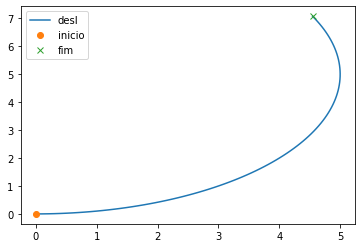

In [ ]:
plt.plot(out[:,0], out[:,1])
plt.plot(out[0,0], out[0,1], 'o')
plt.plot(out[-1,0], out[-1,1], 'x')
plt.legend(['desl', 'inicio', 'fim'])

In [ ]:
global task
task = 0
def bicycle_controller (y,t):
    global task
    theta = y[2]
    if task == 0:
        posRef = [-2,-2]
    else:
        posRef = [2,2]

    alpha_r = np.arctan2(posRef[1]-y[1],posRef[0]-y[0] )
    Ref = np.array([posRef[0], posRef[1], alpha_r])
    e =  Ref - y
    
    if np.sqrt(e[0]**2 + e[1]**2) < 0.1:
        task = 1

    # Controle, valores empíricos pode ser tornar instável o controle
    v =     0.3*np.sqrt(e[0]**2 + e[1]**2)
    alpha = 0.2*e[2]
    
    # Limitações fisicas
    if abs(alpha)> np.pi/4:
        alpha = np.pi/4*np.sign(alpha)
    if abs(v)>0.8:
        v = 0.8*np.sign(v)

    omega = v/0.1*np.tan(alpha)


    # model
    dy = np.dot(np.array([[np.cos(theta), 0],
                            [np.sin(theta), 0],
                            [0, 1]]), np.array([[v],[omega]]))
    return dy.flatten()

In [ ]:
t = np.linspace(0,30, 1000)
y0 = [1,0,-np.pi]
out = odeint(bicycle_controller, y0, t)

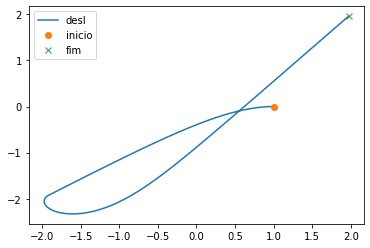

In [ ]:
plt.plot(out[:,0], out[:,1])
plt.plot(out[0,0], out[0,1], 'o')
plt.plot(out[-1,0], out[-1,1], 'x')
plt.legend(['desl', 'inicio', 'fim'])